In [1]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#models 
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

# pclass:    Ticket class 
# sibsp:     siblings / spouses  in the ship
# parch:     parents / children in the ship
# cabin:     Cabin number
# embarked:  Port of Embarkation

In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Extracting  sign of respect(Mr, Mrs, Miss, Master)
#Function to Extract status ( need to pass exact colomn to function in dataframe)
import re
def Ext(col):
    #col = titanic_train['Name']
    names = []
    for val in col:
        names.append(val)
    def splitter(name): 
        result = re.split('(?<!\d)[,.]|[,.](?!\d)', name)
        result = result[1]
        return result
    final_res = []
    for name in names:
        add = splitter(name)
        final_res.append(add)
    return final_res 
titanic_train['Status'] = Ext(titanic_train["Name"])
titanic_test['Status'] = Ext(titanic_test["Name"])
# titanic_train['status'] = final_res
# titanic_train['status'].value_counts()

In [5]:
titanic_train['Status'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Sir               1
 the Countess      1
 Ms                1
 Don               1
 Lady              1
 Jonkheer          1
 Mme               1
 Capt              1
Name: Status, dtype: int64

In [6]:
titanic_test['Status'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dr          1
 Dona        1
 Ms          1
Name: Status, dtype: int64

In [7]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#checking for missing values 
missing_total = titanic_train.isnull().sum()
missing_total

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Status           0
dtype: int64

In [9]:
#plotting 
#attributes = ['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
corr_matrix = titanic_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

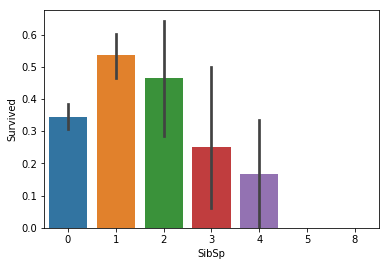

In [10]:
sns.barplot(x='SibSp', y='Survived', data=titanic_train)

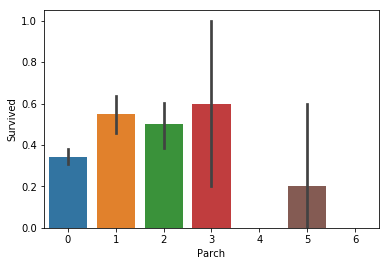

In [11]:
sns.barplot(x='Parch', y='Survived', data=titanic_train)

C:\Users\Ishitha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


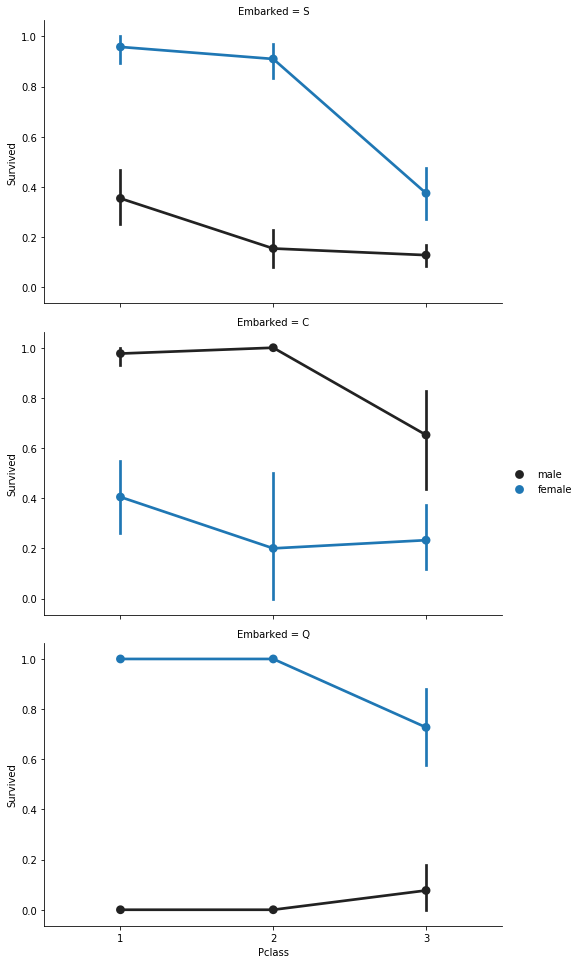

In [12]:
Grid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
Grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
Grid.add_legend()

C:\Users\Ishitha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


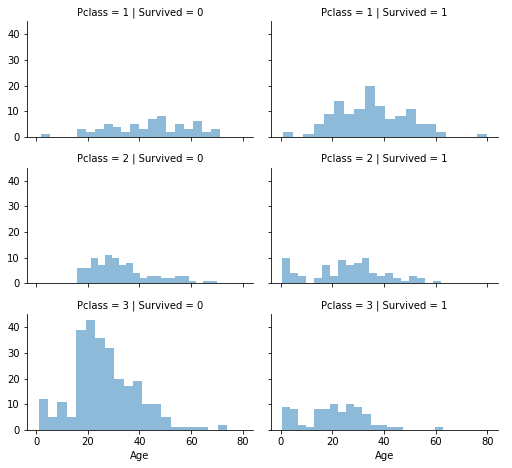

In [13]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [14]:
# Trying out attribute combinations 
titanic_train['SibSpParch'] = (titanic_train['SibSp'] + titanic_train['Parch']) % 2
#titanic_train.corr()['Survived']['SibSpParch']
corr_matrix = titanic_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
SibSpParch     0.157418
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [15]:
# titanic_train['new'] = ((titanic_train['Fare']/10) + titanic_train['SibSpParch'])
# titanic_train.corr()['Survived']['new']

In [16]:
titanic_test['SibSpParch'] = (titanic_test['SibSp'] + titanic_test['Parch']) % 2

# Preprocessing 

In [17]:
# Dropping out useless features 
titanic_train_labels = titanic_train['Survived'].copy()
titanic_train = titanic_train.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_test = titanic_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
#Too much missing values in Cabin but here a cabin number looks like ‘C123’ and the letter refers to the deck
#so you can try to find something which makes sense using Cabin 
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,SibSpParch
0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,female,35.0,1,0,53.1000,S,Mrs,1
4,3,male,35.0,0,0,8.0500,S,Mr,0


In [18]:
# fill missing values in Embarked using common value
titanic_train['Embarked'].describe()
# since common values is S 
common ='S'
datasets = [titanic_train, titanic_test]
for val in datasets:
    val['Embarked']=val['Embarked'].fillna(common)
# titanic_test.isnull().sum()
# titanic_train.isnull().sum()

In [19]:
# Fill Age with median 
median = titanic_train['Age'].median()
titanic_train = titanic_train.fillna(median)
titanic_test = titanic_test.fillna(median)

### Converting categorical data into numerical data  

In [20]:
# 1. Sex
gender = {"male":1, "female":0}
datasets = [titanic_train, titanic_test]
for val in datasets:
    val['Sex'] = val['Sex'].map(gender)

In [21]:
# 2. Embarked and Status  
# Here you can use sklearn one hot encoder or pandas get dummies 
titanic_train = pd.get_dummies(titanic_train)
titanic_test = pd.get_dummies(titanic_test)

In [22]:
titanic_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,SibSpParch,Embarked_C,Embarked_Q,Embarked_S,...,Status_ Master,Status_ Miss,Status_ Mlle,Status_ Mme,Status_ Mr,Status_ Mrs,Status_ Ms,Status_ Rev,Status_ Sir,Status_ the Countess
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.244669,0.188552,0.086420,0.725028,...,0.044893,0.204265,0.002245,0.001122,0.580247,0.140292,0.001122,0.006734,0.001122,0.001122
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.430132,0.391372,0.281141,0.446751,...,0.207186,0.403390,0.047351,0.033501,0.493796,0.347485,0.033501,0.081830,0.033501,0.033501
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Filling train and test set with unavlible features 
titanic_train['Status_ Dona'] = 0 
features = ['Status_Major','Status_Mlle','Status_Jonkheer','Status_Don','Status_Capt','Status_Mme','Status_Sir','Status_the Countess','Status_Lady']
for ft in features:
    titanic_test[ft] = 0 

titanic_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,SibSpParch,Embarked_C,Embarked_Q,Embarked_S,...,Status_ Rev,Status_Major,Status_Mlle,Status_Jonkheer,Status_Don,Status_Capt,Status_Mme,Status_Sir,Status_the Countess,Status_Lady
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0
mean,2.265550,0.636364,29.805024,0.447368,0.392344,35.608942,0.222488,0.244019,0.110048,0.645933,...,0.004785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.841838,0.481622,12.667969,0.896760,0.981429,55.841747,0.416416,0.430019,0.313324,0.478803,...,0.069088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Put feature names into a order 
titanic_train = titanic_train.sort_index(axis=1)
titanic_test = titanic_test.sort_index(axis=1)

In [25]:
#Standardization 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
my_pip = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    #('min_max', MinMaxScaler())
])
# titanic_train = my_pip.fit_transform(titanic_train)
# titanic_test = my_pip.fit_transform(titanic_test)
titanic_train[['Pclass','Age','Fare','SibSp','Parch']] = my_pip.fit_transform(titanic_train[['Pclass','Age','Fare','SibSp','Parch']])
titanic_test[['Pclass','Age','Fare','SibSp','Parch']] = my_pip.fit_transform(titanic_test[['Pclass','Age','Fare','SibSp','Parch']])
titanic_train

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex,SibSp,SibSpParch,...,Status_ Master,Status_ Miss,Status_ Mlle,Status_ Mme,Status_ Mr,Status_ Mrs,Status_ Ms,Status_ Rev,Status_ Sir,Status_ the Countess
0,-0.565736,0,0,1,-0.502445,-0.473674,0.827377,1,0.432793,1,...,0,0,0,0,1,0,0,0,0,0
1,0.663861,1,0,0,0.786845,-0.473674,-1.566107,0,0.432793,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.258337,0,0,1,-0.488854,-0.473674,0.827377,0,-0.474545,0,...,0,1,0,0,0,0,0,0,0,0
3,0.433312,0,0,1,0.420730,-0.473674,-1.566107,0,0.432793,1,...,0,0,0,0,0,1,0,0,0,0
4,0.433312,0,0,1,-0.486337,-0.473674,0.827377,1,-0.474545,0,...,0,0,0,0,1,0,0,0,0,0
5,-0.104637,0,1,0,-0.478116,-0.473674,0.827377,1,-0.474545,0,...,0,0,0,0,1,0,0,0,0,0
6,1.893459,0,0,1,0.395814,-0.473674,-1.566107,1,-0.474545,0,...,0,0,0,0,1,0,0,0,0,0
7,-2.102733,0,0,1,-0.224083,0.767630,0.827377,1,2.247470,0,...,1,0,0,0,0,0,0,0,0,0
8,-0.181487,0,0,1,-0.424256,2.008933,0.827377,0,-0.474545,0,...,0,0,0,0,0,1,0,0,0,0
9,-1.180535,1,0,0,-0.042956,-0.473674,-0.369365,0,0.432793,1,...,0,0,0,0,0,1,0,0,0,0


# Training using machine learning models 

### 1. Random Forest 

In [26]:
model = RandomForestClassifier(n_estimators=100)
#model = DecisionTreeClassifier()
#model = KNeighborsClassifier(n_neighbors = 3)
model.fit(titanic_train, titanic_train_labels)
score = round(model.score(titanic_train, titanic_train_labels)*100, 2)
score

98.2

### To be cont.
## 2. Logistic Regression
## 3. K Nearest Neighbor
## 4. Gaussian Naive Bayes
## 5. Stochastic Gradient Descent (SGD)
## 6. Linear Support Vector Machine
## 7. Decision Tree
## 8. Perceptron

## And then we have K-Fold Cross Validation

## Predicting using test set 

In [27]:
pred = model.predict(titanic_test)

## Saving predictions 

In [28]:
final_dframe = pd.DataFrame()
titanic_test = pd.read_csv("test.csv")
final_dframe['PassengerId'] = titanic_test['PassengerId']
final_dframe['Survived'] = pred
print(final_dframe)
final_dframe.to_csv('sub_9_24.csv',index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         0
19           911         0
20           912         1
21           913         1
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3